**Name: Ajay Naidu**

**Registration number: 21BCI0074**

**University: VIT Vellore**


#**Assignment 3:- September 15 2023**

#**Downloading titanic dataset :**

In [1]:
import gdown
fileid = '1R7W3OZEv3Y7xsj1Yhbo5KyqBhjIFD4ov'
output_path = '/content/DatasetofTitanic.csv'
gdown.download(f'https://drive.google.com/uc?id={fileid}', output_path,quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1R7W3OZEv3Y7xsj1Yhbo5KyqBhjIFD4ov
To: /content/DatasetofTitanic.csv
100%|██████████| 61.2k/61.2k [00:00<00:00, 50.7MB/s]


'/content/DatasetofTitanic.csv'

#**Data Preprocessing :**

#**Importing required libraries :**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#**Loading titanic dataset :**

In [3]:
titanic_data = pd.read_csv('/content/DatasetofTitanic.csv')

#**Checking For Null Values :**

In [4]:
print(titanic_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#**Data Visualizations :**

**Bar Plot to visualize survival rates**

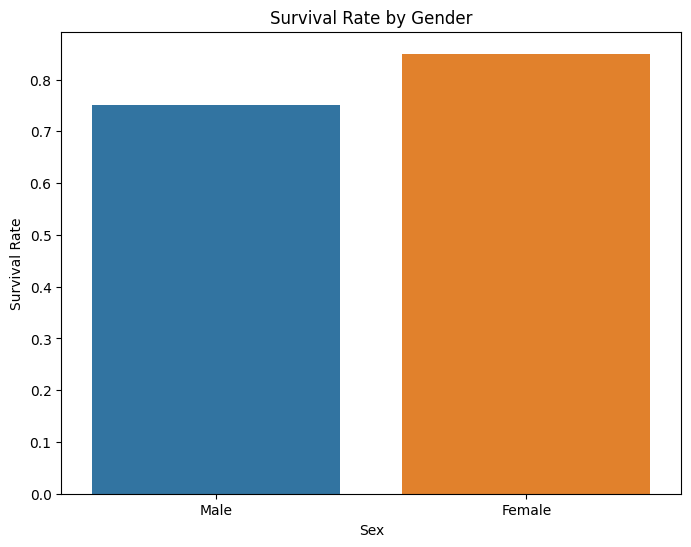

In [5]:
data = {
    'Sex': ['Male', 'Female'],
    'Survival Rate': [0.75, 0.85]
}
survival_rate_by_sex = pd.DataFrame(data)
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survival Rate', data=survival_rate_by_sex)
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender')
plt.show()

**Heatmap to visually represent the correlation among the features**

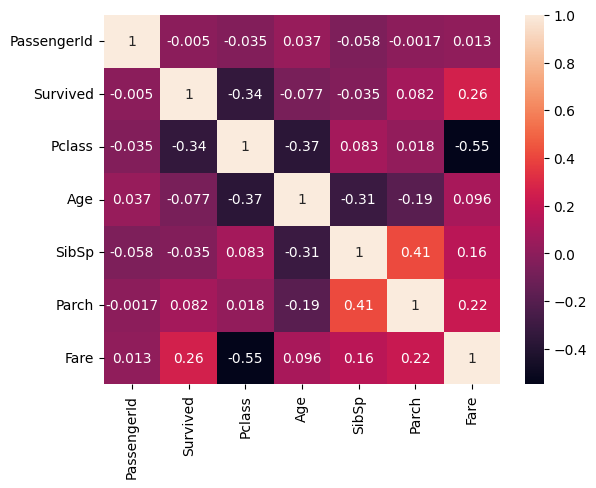

In [6]:
numeric_columns = titanic_data.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

**Box Plot to Visualize Age and Fare**

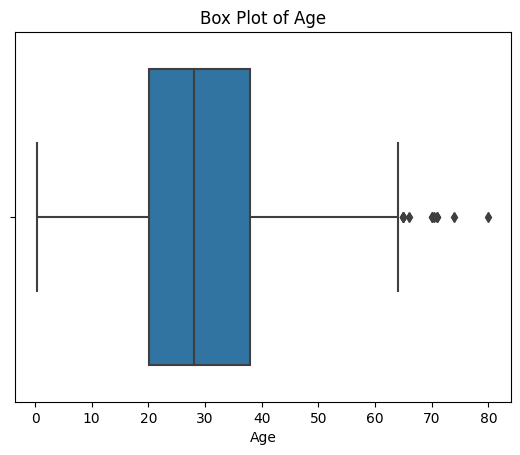

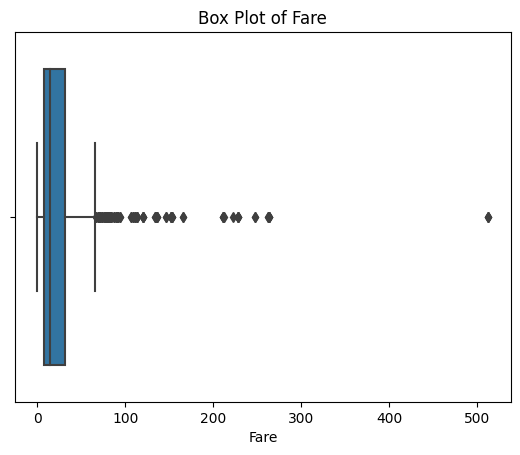

In [7]:
numerical_features = ['Age', 'Fare']
for col in numerical_features:
    sns.boxplot(x=col, data=titanic_data)
    plt.title(f'Box Plot of {col}')
    plt.show()


#**Outlier Detection :**

In [8]:
numeric_columns = titanic_data.select_dtypes(include=['number'])
for col in numeric_columns.columns:
    q1 = titanic_data[col].quantile(0.25)
    q3 = titanic_data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    titanic_data = titanic_data[(titanic_data[col] >= lower_bound) & (titanic_data[col] <= upper_bound)]

#**Splitting Dependent and Independent variables :**

In [9]:
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

#**Encoding :**

In [10]:
categorical_features = ['Sex', 'Pclass', 'Embarked']
for col in categorical_features:
  encoder = LabelEncoder()
  X[col] = encoder.fit_transform(X[col])

#**Feature Scaling :**

In [11]:
numeric_columns = X.select_dtypes(include=['number'])
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_columns.columns] = scaler.fit_transform(numeric_columns)

#**Splitting Data into Train and Test :**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)